# 6.4 Supervised Machine Learning: Regression

### This script contains the following points:
- **01. Importing Libraries & Data**
- **02. Data Cleaning**
- **03. Exploratory Data Analysis**
- **04. Data Prep for Regresssion Analysis**
- **05. Hypothesis**
- **06. Reshape Variables into NumPy Arrays**
- **07. Split the Data into Training and Test Sets**
- **08. Run a Linear Regression on the Data**
- **09. Visualize the Results**
- **10. Interpretation of the Results**
- **11. Check Model Performance Statistics**
- **12. Compare the Predicted y Values with the Actual y Values in a Dataframe**
- **13. Linear Regression After Removing Outliers**
- **14. Final Thoughts on How Well the Model Performed**

## 01. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turn Path into a String & Assign Python Shortcut
path = '/Users/mgottlieb/Documents/World Happiness Analysis'

In [4]:
# Import the dataset for this task
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_happiness_flags.csv'))

In [5]:
# Check the import
df_happiness.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,region,democracy_status,Life Ladder Group,broad_region,Life Expectancy Group
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,Southern Asia,Non-Democratic,Low,Asia,Medium
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,Southern Asia,Non-Democratic,Low,Asia,Medium
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,Southern Asia,Non-Democratic,Low,Asia,Medium
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,Southern Asia,Non-Democratic,Low,Asia,Medium
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,Southern Asia,Non-Democratic,Low,Asia,Medium


In [6]:
# Check the import
df_happiness.shape

(2363, 16)

In [7]:
# Check the import
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   life_ladder                       2363 non-null   float64
 3   log_gdp_per_capita                2363 non-null   float64
 4   social_support                    2363 non-null   float64
 5   healthy_life_expectancy_at_birth  2363 non-null   float64
 6   freedom_to_make_life_choices      2363 non-null   float64
 7   generosity                        2363 non-null   float64
 8   perceptions_of_corruption         2363 non-null   float64
 9   positive_affect                   2363 non-null   float64
 10  negative_affect                   2363 non-null   float64
 11  region                            2363 non-null   object 
 12  democr

## 02. Data Cleaning

In [8]:
# Rename columns to be standardized
df_happiness = df_happiness.rename(columns={
    'Life Ladder Group': 'life_ladder_group',
    'Life Expectancy Group': 'life_expectancy_group'
})

In [9]:
# Verify the changes
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   life_ladder                       2363 non-null   float64
 3   log_gdp_per_capita                2363 non-null   float64
 4   social_support                    2363 non-null   float64
 5   healthy_life_expectancy_at_birth  2363 non-null   float64
 6   freedom_to_make_life_choices      2363 non-null   float64
 7   generosity                        2363 non-null   float64
 8   perceptions_of_corruption         2363 non-null   float64
 9   positive_affect                   2363 non-null   float64
 10  negative_affect                   2363 non-null   float64
 11  region                            2363 non-null   object 
 12  democr

The following data cleaning steps have already previously been done:
- Check for missing values
- Check for duplicate values

## 03. Exploratory Data Analysis

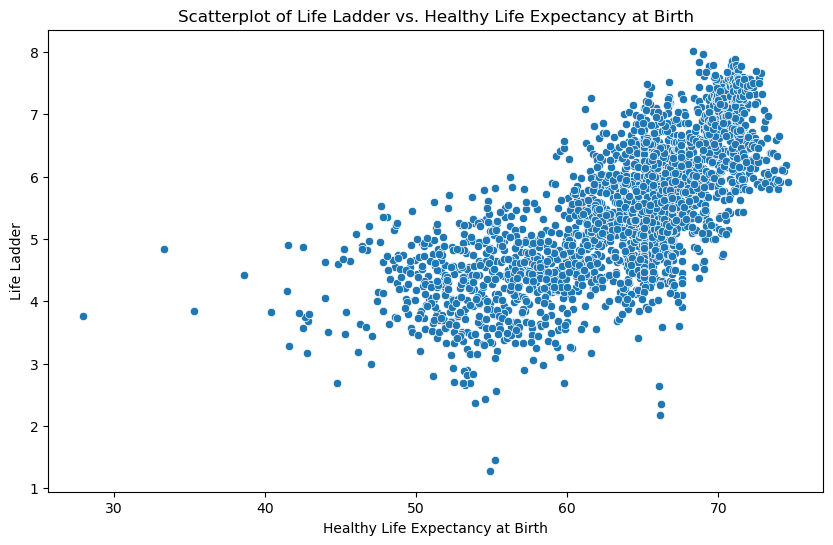

In [13]:
# Scatterplot for life_ladder vs. healthy_life_expectancy_at_birth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='healthy_life_expectancy_at_birth', y='life_ladder', data=df_happiness)
plt.title('Scatterplot of Life Ladder vs. Healthy Life Expectancy at Birth')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Life Ladder')
plt.show()

This scatterplot shows a clear positive trend, suggesting that as life expectancy increases, the happiness score (life ladder) also tends to increase.

### I will be looking at this question in my initial questions:
- How does life expectancy influence happiness scores?

## 04. Data Prep for Regresssion Analysis

### Life Ladder Extreme Values Check
I will not be removing any extreme values, but merely checking if there are any, then at the end I can see if there is a performance improvement of the regression model after removing outliers.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


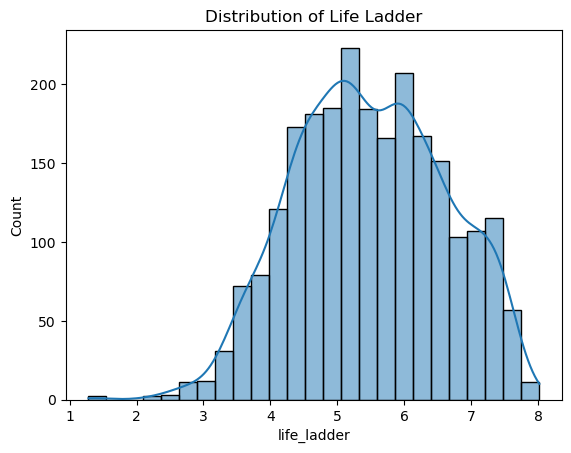

In [12]:
# Visualize the distribution of the dependent variable (life_ladder)
sns.histplot(df_happiness['life_ladder'], bins=25, kde=True)
plt.title('Distribution of Life Ladder')
plt.show()

In [15]:
# Check the mean
df_happiness['life_ladder'].mean() 

5.48356241757114

In [16]:
# Check the median
df_happiness['life_ladder'].median() 

5.448724746704102

In [17]:
# Check the max
df_happiness['life_ladder'].max() 

8.01893424987793

In [18]:
# Check the min
df_happiness['life_ladder'].min() 

1.2812711000442505

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


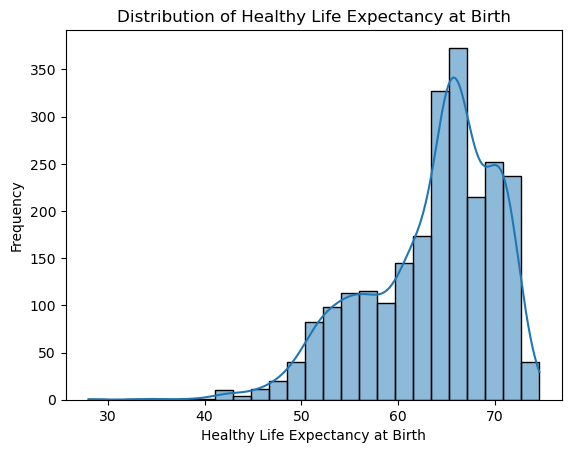

In [21]:
# Visualize the distribution of the independent variable (healthy_life_expectancy_at_birth)
sns.histplot(df_happiness['healthy_life_expectancy_at_birth'], bins=25, kde=True)
plt.title('Distribution of Healthy Life Expectancy at Birth')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Check the mean
df_happiness['healthy_life_expectancy_at_birth'].mean() 

63.46992169161041

In [23]:
# Check the median
df_happiness['healthy_life_expectancy_at_birth'].median() 

65.0999984741211

In [24]:
# Check the max
df_happiness['healthy_life_expectancy_at_birth'].max() 

74.5999984741211

In [25]:
# Check the min
df_happiness['healthy_life_expectancy_at_birth'].min() 

28.0

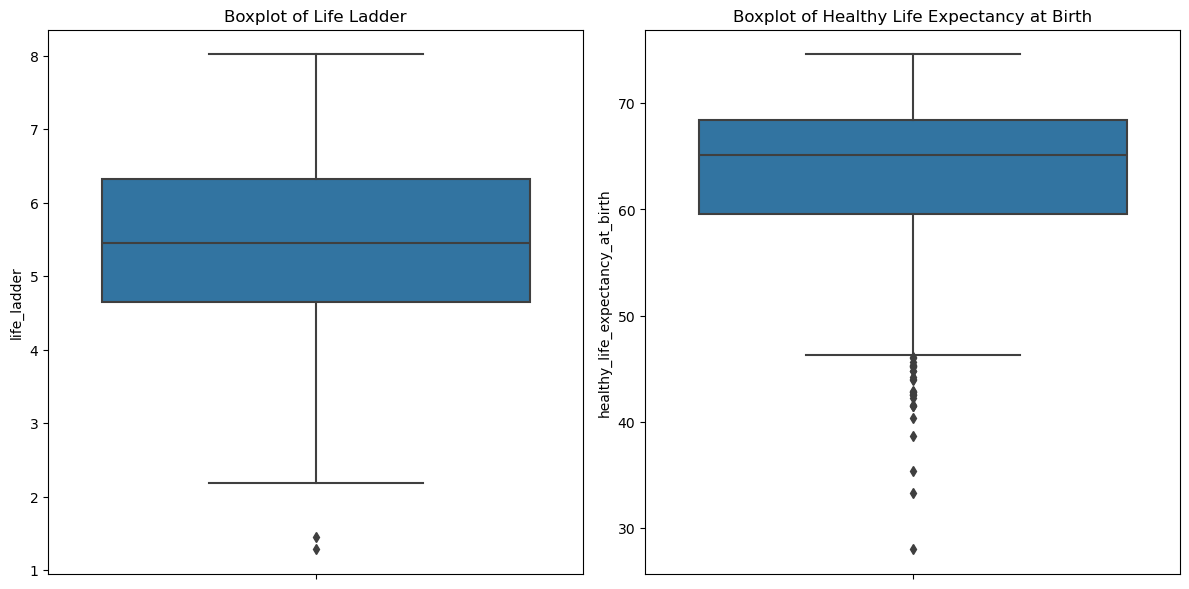

In [26]:
# Check for extreme values using boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_happiness['life_ladder'])
plt.title('Boxplot of Life Ladder')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_happiness['healthy_life_expectancy_at_birth'])
plt.title('Boxplot of Healthy Life Expectancy at Birth')

plt.tight_layout()
plt.show()

There does appear to be outliers for both these variables. **I will remove these after creating the regression model to see if removing them makes the model a better fit.**

In [27]:
# Calculate the IQR for life_ladder
Q1_life_ladder = df_happiness['life_ladder'].quantile(0.25)
Q3_life_ladder = df_happiness['life_ladder'].quantile(0.75)
IQR_life_ladder = Q3_life_ladder - Q1_life_ladder
lower_cutoff_life_ladder = Q1_life_ladder - 1.5 * IQR_life_ladder

print(f"Lower cutoff for life_ladder outliers: {lower_cutoff_life_ladder}")

Lower cutoff for life_ladder outliers: 2.1314860582351685


In [28]:
# Calculate the IQR for healthy_life_expectancy_at_birth
Q1_life_expectancy = df_happiness['healthy_life_expectancy_at_birth'].quantile(0.25)
Q3_life_expectancy = df_happiness['healthy_life_expectancy_at_birth'].quantile(0.75)
IQR_life_expectancy = Q3_life_expectancy - Q1_life_expectancy
lower_cutoff_life_expectancy = Q1_life_expectancy - 1.5 * IQR_life_expectancy

print(f"Lower cutoff for healthy_life_expectancy_at_birth outliers: {lower_cutoff_life_expectancy}")

Lower cutoff for healthy_life_expectancy_at_birth outliers: 46.262497901916504


## 05. Hypothesis
### Higher healthy life expectancy at birth leads to higher happiness (life satisfaction) scores.

## 06. Reshape Variables into NumPy Arrays



#### For this task I will use the following values:
- **Independent Variable (X): healthy_life_expectancy_at_birth** \
This variable represents the average number of years a newborn is expected to live in good health. It serves as a proxy for overall life expectancy and health conditions in a country.
- **Dependent Variable (y): life_ladder** \
This variable measures life satisfaction.

In [29]:
# Define the independent variable (x) and the dependent variable (y)
X = df_happiness['healthy_life_expectancy_at_birth'].values.reshape(-1, 1)
y = df_happiness['life_ladder'].values

In [30]:
X

array([[50.5       ],
       [50.79999924],
       [51.09999847],
       ...,
       [54.04999924],
       [54.52500153],
       [55.        ]])

In [31]:
y

array([3.7235899 , 4.40177822, 4.75838089, ..., 3.15457821, 3.29621959,
       3.57238626])

## 07. Split the Data into Training and Test Sets

In [32]:
# Split the data into training and test sets, 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1654, 1)
X_test shape: (709, 1)
y_train shape: (1654,)
y_test shape: (709,)


This is indeed a 70/30 split.

## 08. Run a Linear Regression on the Data
Create and train the regression model:
- Fit the model you created to the *training* set.
- Create a prediction for y on the *test* set.

In [34]:
# Initialize the linear regression model
regression = LinearRegression()

In [35]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

This indicates that the fitting process has completed successfully.

In [36]:
# Make predictions on the test set
y_pred = regression.predict(X_test)

## 09. Visualize the Results

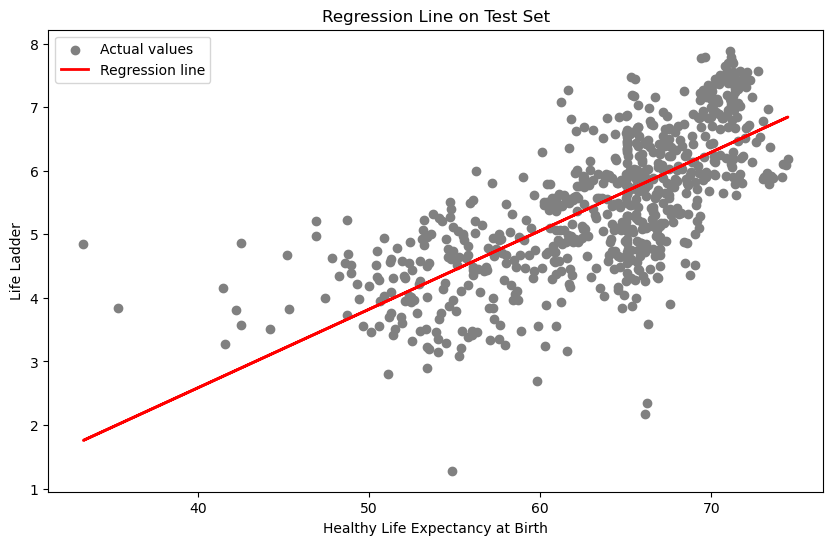

In [40]:
# Create a plot that shows the regression line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Regression Line on Test Set')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Life Ladder')
plt.legend()

# Export the chart
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plt.savefig(file_name)

plt.show()

## 10. Interpretation of the Results

The regression line confirms the hypothesis that an increase in healthy life expectancy at birth is generally associated with higher life ladder (happiness) scores, a upward or positive correlation.\
\
However, the scatter plot also show a considerable spread of the actual data points around regression line. After I check the model's performance metrics, I will remove the outliers and see how better the new fit is.

## 11. Check Model Performance Statistics

In [43]:
# Check model performance statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
# Print the model summary statistics
print('Slope:', regression.coef_)
print('Mean squared error:', mse)
print('R2 score:', r2)

Slope: [0.12362079]
Mean squared error: 0.6684211044636096
R2 score: 0.48563585625444383


## 12. Compare the Predicted y Values with the Actual y Values in a Dataframe

In [48]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [49]:
# Display the first 30 rows to compare
comparison_df.head(30)

,Actual,Predicted
0,5.252193,5.462385
1,6.552779,6.157134
2,5.548508,4.571698
3,4.553922,5.687375
4,6.012740,5.709009
5,5.767429,5.341237
6,5.464623,5.081634
7,3.761965,4.166840
8,5.792696,6.710337
9,5.938396,6.138591


In [50]:
# Get information about the dataframe
comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     709 non-null    float64
 1   Predicted  709 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


In [51]:
# Get summary statistics of the dataframe
comparison_df.describe()

,Actual,Predicted
count,709.000000,709.000000
mean,5.479300,5.486970
std,1.140765,0.827307
min,1.281271,1.758707
25%,4.660161,5.069271
50%,5.467451,5.687375
75%,6.295645,6.082962
max,7.889350,6.846320


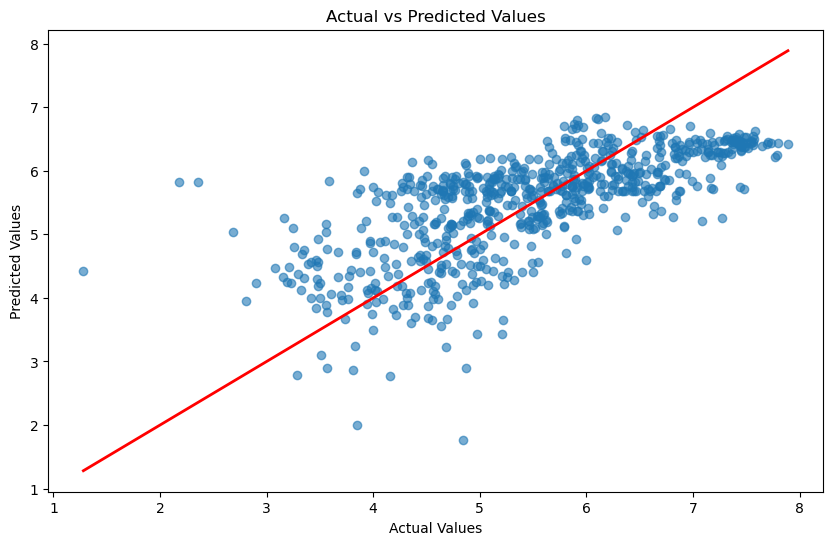

In [55]:
# Scatter plot to visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.6)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## 13. Linear Regression After Removing Outliers

In [56]:
# Define cutoff values (these values were from the 04. Data Prep for Regresssion Analysis section)
lower_cutoff_life_ladder = 2.1314860582351685
lower_cutoff_healthy_life_expectancy_at_birth = 46.262497901916504

In [57]:
# Filter the dataset to remove outliers
df_filtered = df_happiness[
    (df_happiness['life_ladder'] >= lower_cutoff_life_ladder) &
    (df_happiness['healthy_life_expectancy_at_birth'] >= lower_cutoff_healthy_life_expectancy_at_birth)
]

In [58]:
# Define the independent variable (X) and dependent variable (y)
X = df_filtered[['healthy_life_expectancy_at_birth']]
y = df_filtered['life_ladder']

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Create and train the regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = regression.predict(X_test)

In [62]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
# Print the model summary statistics
print('Slope:', regression.coef_)
print('Mean squared error:', mse)
print('R2 score:', r2)

Slope: [0.12838483]
Mean squared error: 0.5894122271791432
R2 score: 0.527642441822879


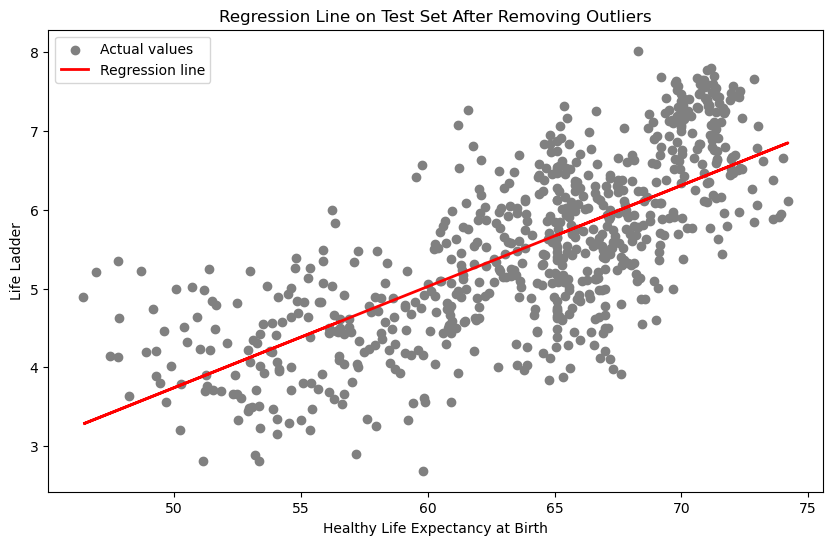

In [65]:
# Create a plot that shows the regression line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Regression Line on Test Set After Removing Outliers')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Life Ladder')
plt.legend()

# Export the chart
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set_outliers_removed.png')
plt.savefig(file_name)

plt.show()

In [66]:
# Create a dataframe comparing the actual and predicted values of y
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [67]:
# Display the first 30 rows to compare
comparison_df.head(30)

,Actual,Predicted
562,5.081306,5.683214
1367,5.990751,5.770515
1350,5.740501,5.516955
659,4.180315,4.910336
1549,4.608658,4.627890
1879,6.462076,6.422068
1633,5.570062,5.672943
603,4.204157,5.259543
1138,5.252193,5.446985
2334,5.243996,3.919206


In [68]:
# Get summary statistics of the dataframe
comparison_df.describe()

,Actual,Predicted
count,701.000000,701.000000
mean,5.513752,5.513809
std,1.117852,0.787583
min,2.687553,3.282417
25%,4.661013,5.056696
50%,5.502756,5.680645
75%,6.362125,6.107526
max,8.018934,6.848947


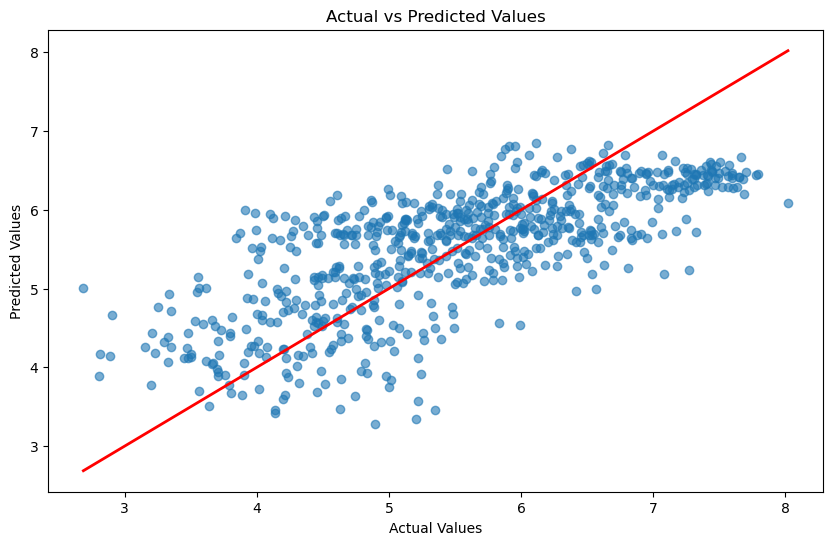

In [69]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.6)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## 14. Final Thoughts on How Well the Model Performed

### Model Performance with Outliers:
**Slope:** 0.12362079\
**Mean Squared Error (MSE):** 0.6684211044636096\
**R2 Score:** 0.48563585625444383
### Model Performance without Outliers:
**Slope:** 0.12838483\
**Mean Squared Error (MSE):** 0.5894122271791432\
**R2 Score:** 0.527642441822879

 Removing outliers has improved the model's fit. 
 - Higher R2 score: This improvement in the R2 score suggests that the model has become more effective at explaining the variance in the dependent variable.
 - Lower MSE: This suggests that the model's predictions are even closer to the actual values.

The presence of outliers can bias the regression model by disproportionately affecting the slope and fit of the regression line. In this case, removing them seems to have led to a more accurate and reliable model.

While the model without outliers shows improved performance, with a lower MSE and a higher R2 score, it still only explains approximately 52.8% of the variance in Life Ladder scores. This suggests that while Healthy Life Expectancy at Birth is a significant predictor of Life Ladder, there are other factors contributing to life satisfaction that are not captured by this model.